In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
df = yf.download("AAPL", start="2020-01-01", end="2023-01-01")

prices = df['Close']

returns = prices.pct_change().dropna()
returns.head()


C:\Users\siddh\AppData\Local\Temp\ipykernel_19088\296637716.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2020-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2020-01-03,-0.009722
2020-01-06,0.007968
2020-01-07,-0.004703
2020-01-08,0.016086
2020-01-09,0.021241


In [3]:
from statsmodels.tsa.stattools import adfuller

adf_price = adfuller(prices.dropna())
adf_returns = adfuller(returns)

print("ADF Price p-value:", adf_price[1])
print("ADF Returns p-value:", adf_returns[1])


ADF Price p-value: 0.3372971852287687
ADF Returns p-value: 1.9513611013682363e-14


<Figure size 1000x400 with 0 Axes>

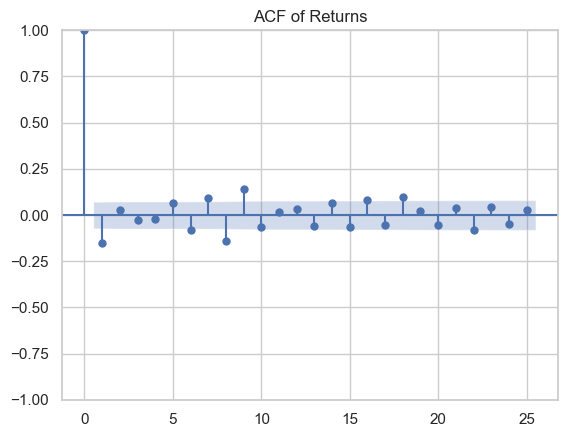

In [4]:
plt.figure(figsize=(10,4))
plot_acf(returns, lags=25)
plt.title("ACF of Returns")
plt.show()


<Figure size 1000x400 with 0 Axes>

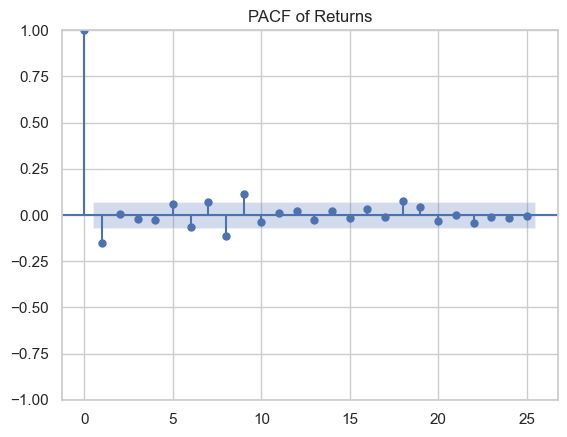

In [5]:
plt.figure(figsize=(10,4))
plot_pacf(returns, lags=25, method='ywm')
plt.title("PACF of Returns")
plt.show()


In [6]:
ar1_model = sm.tsa.ARIMA(returns, order=(1,0,0)).fit()
print(ar1_model.summary())


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  755
Model:                 ARIMA(1, 0, 0)   Log Likelihood                1777.281
Date:                Fri, 05 Dec 2025   AIC                          -3548.562
Time:                        16:02:23   BIC                          -3534.682
Sample:                             0   HQIC                         -3543.216
                                - 755                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.404      0.160      -0.000       0.002
ar.L1         -0.1510      0.024     -6.242      0.000      -0.198      -0.104
sigma2         0.0005   1.76e-05     29.964      0.0

C:\Users\siddh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\siddh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\siddh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [7]:
ma1_model = sm.tsa.ARIMA(returns, order=(0,0,1)).fit()
print(ma1_model.summary())


C:\Users\siddh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\siddh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\siddh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  755
Model:                 ARIMA(0, 0, 1)   Log Likelihood                1777.075
Date:                Fri, 05 Dec 2025   AIC                          -3548.149
Time:                        16:05:37   BIC                          -3534.269
Sample:                             0   HQIC                         -3542.802
                                - 755                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.424      0.154      -0.000       0.002
ma.L1         -0.1500      0.026     -5.849      0.000      -0.200      -0.100
sigma2         0.0005   1.78e-05     29.769      0.0

In [8]:
print("AR(1) AIC:", ar1_model.aic)
print("MA(1) AIC:", ma1_model.aic)


AR(1) AIC: -3548.5624337103345
MA(1) AIC: -3548.1490278928945


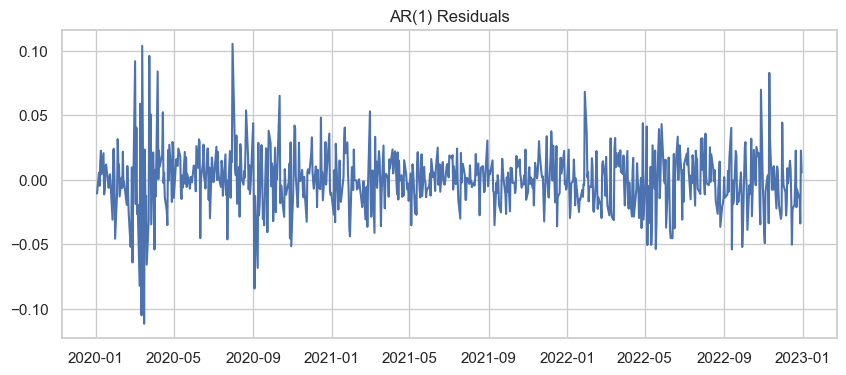

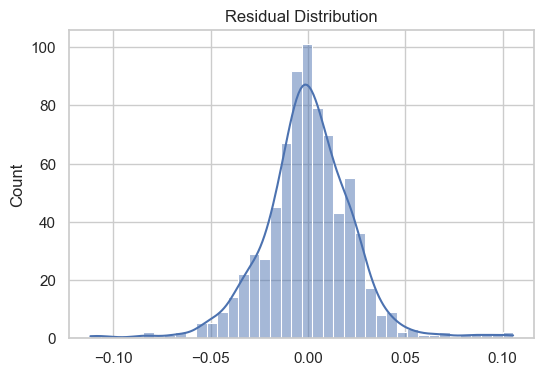

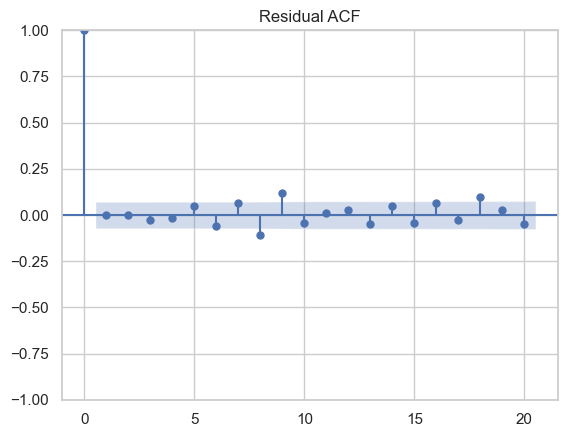

In [9]:
residuals = ar1_model.resid

plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("AR(1) Residuals")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

plot_acf(residuals, lags=20)
plt.title("Residual ACF")
plt.show()


In [10]:
forecast = ar1_model.forecast(steps=5)
forecast


C:\Users\siddh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\siddh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


755    0.000803
756    0.001055
757    0.001017
758    0.001023
759    0.001022
Name: predicted_mean, dtype: float64

In [11]:
ar2_model = sm.tsa.ARIMA(returns, order=(2,0,0)).fit()
print(ar2_model.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  755
Model:                 ARIMA(2, 0, 0)   Log Likelihood                1777.289
Date:                Fri, 05 Dec 2025   AIC                          -3546.577
Time:                        16:11:00   BIC                          -3528.071
Sample:                             0   HQIC                         -3539.449
                                - 755                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.359      0.174      -0.000       0.002
ar.L1         -0.1502      0.026     -5.878      0.000      -0.200      -0.100
ar.L2          0.0045      0.025      0.178      0.8

C:\Users\siddh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\siddh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\siddh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [16]:
ma2_model = sm.tsa.ARIMA(returns, order =(0,0,2)).fit()
print(ma2_model.summary())

C:\Users\siddh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\siddh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\siddh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  755
Model:                 ARIMA(0, 0, 2)   Log Likelihood                1777.209
Date:                Fri, 05 Dec 2025   AIC                          -3546.419
Time:                        16:14:01   BIC                          -3527.912
Sample:                             0   HQIC                         -3539.290
                                - 755                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.349      0.177      -0.000       0.003
ma.L1         -0.1499      0.026     -5.821      0.000      -0.200      -0.099
ma.L2          0.0232      0.025      0.945      0.3

In [22]:
ar2_model.aic


np.float64(-3546.5774231573646)

In [21]:
ma2_model.aic

np.float64(-3546.4185701461884)

In [23]:
best_model = ar1_model  # or whichever you choose
best_model.forecast(steps=10)


C:\Users\siddh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\siddh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


755    0.000803
756    0.001055
757    0.001017
758    0.001023
759    0.001022
760    0.001022
761    0.001022
762    0.001022
763    0.001022
764    0.001022
Name: predicted_mean, dtype: float64

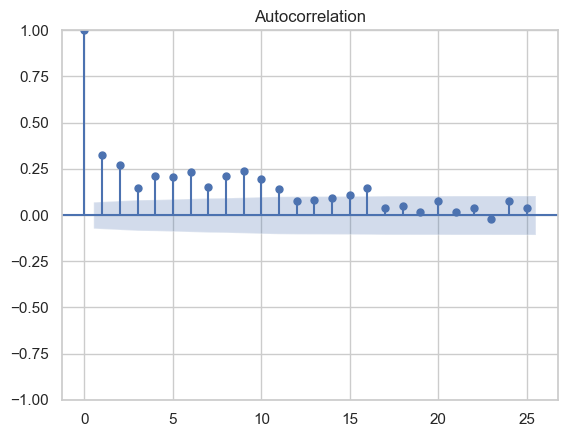

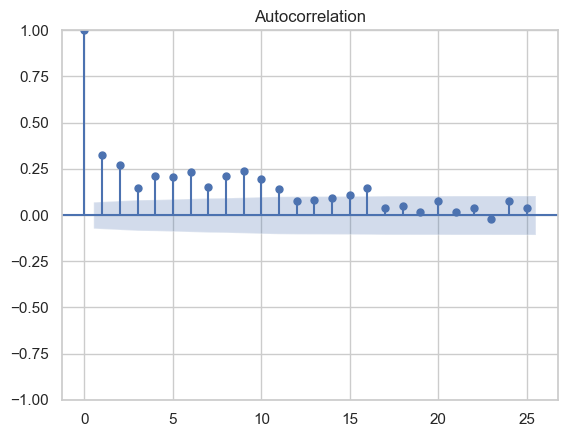

In [24]:
plot_acf(returns**2, lags=25)
